# 4 cross-section extraction
## The justification of moving from 6D analysis to 2$\times$3D

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_extraction/'

# The way to look for decoupling:
is the correction we apply for the protons independent of the muon bins?

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_extraction/p_weights_in_muon_bins.pdf


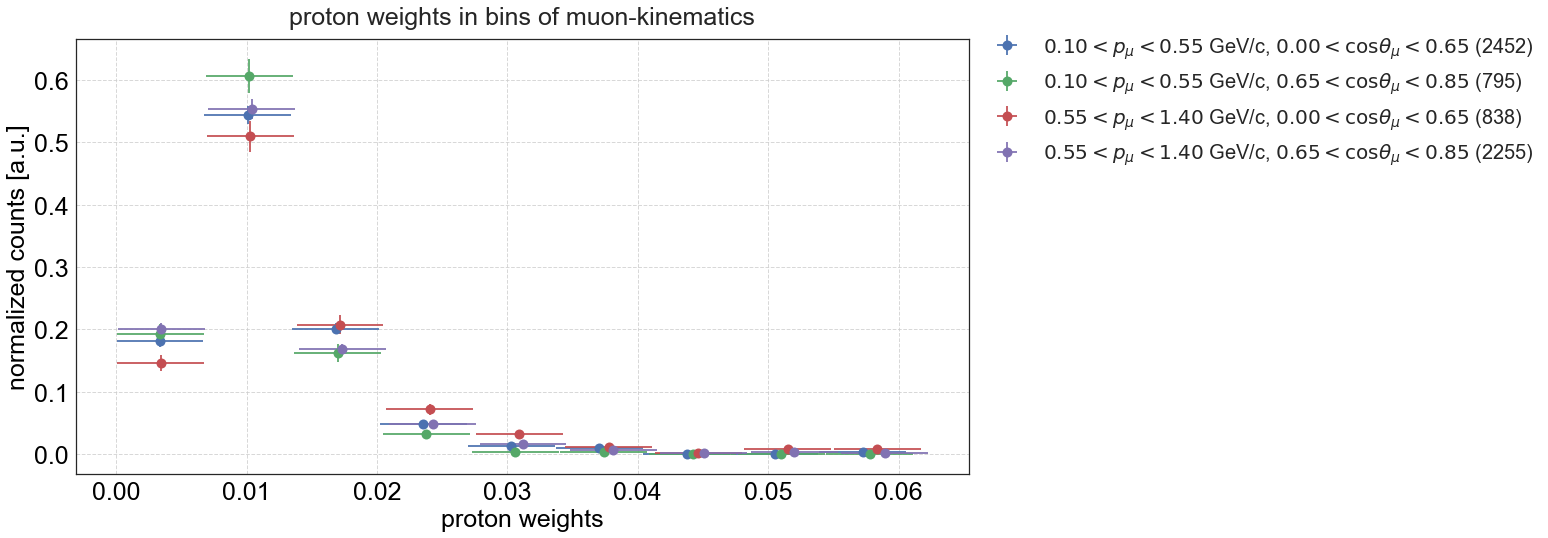

In [64]:
Pmu_bins = [0.1,0.55,1.4]
ctu_bins = [0.,0.65,0.85]
bins=linspace(0,0.06,10)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
Pmu_min_arr,Pmu_max_arr  = Pmu_bins[0:2], Pmu_bins[1:3]
ctu_min_arr,ctu_max_arr  = ctu_bins[0:2], ctu_bins[1:3]
mid = 0.5*(bins[1:]+bins[:-1])
bin_width = bins[1]-bins[0]
for i,(Pmu_min,Pmu_max) in enumerate(zip(Pmu_min_arr,Pmu_max_arr)):
    for j,(ctu_min,ctu_max) in enumerate(zip(ctu_min_arr,ctu_max_arr)):

        sam = selected_CC1p[  (selected_CC1p['truth_Pmu']>Pmu_min) 
                            & (selected_CC1p['truth_Pmu']<Pmu_max) 
                            & (selected_CC1p['truth_Pmu_cos_theta']>ctu_min) 
                            & (selected_CC1p['truth_Pmu_cos_theta']<ctu_max) ]
        sam = sam[(sam["Pp weight"]>0)&(sam["Pp weight"]<1)]
        h,_=np.histogram(sam["Pp weight"],bins=bins)
        herr = np.sqrt(h) / len(sam)
        h = h.astype(np.float) / len(sam)
        plt.errorbar(x=mid*(1+0.01*(2*i + j + 1)),xerr=0.5*bin_width,y=h,yerr=herr,fmt='o',markersize=10,
                     label=r'$%.2f<p_{\mu}<%.2f$ GeV/c, $%.2f<\cos\theta_\mu<%.2f$ (%d)'%(Pmu_min,Pmu_max,ctu_min,ctu_max,len(sam)))
set_axes(ax,r'proton weights',r'normalized counts [a.u.]',do_add_grid=True,do_add_legend=False,title='proton weights in bins of muon-kinematics')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=20)
plt.savefig(figures_path + 'p_weights_in_muon_bins.pdf',bbox_inches='tight')
print 'saved',figures_path + 'p_weights_in_muon_bins.pdf'

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_extraction/mu_weights_in_proton_bins.pdf


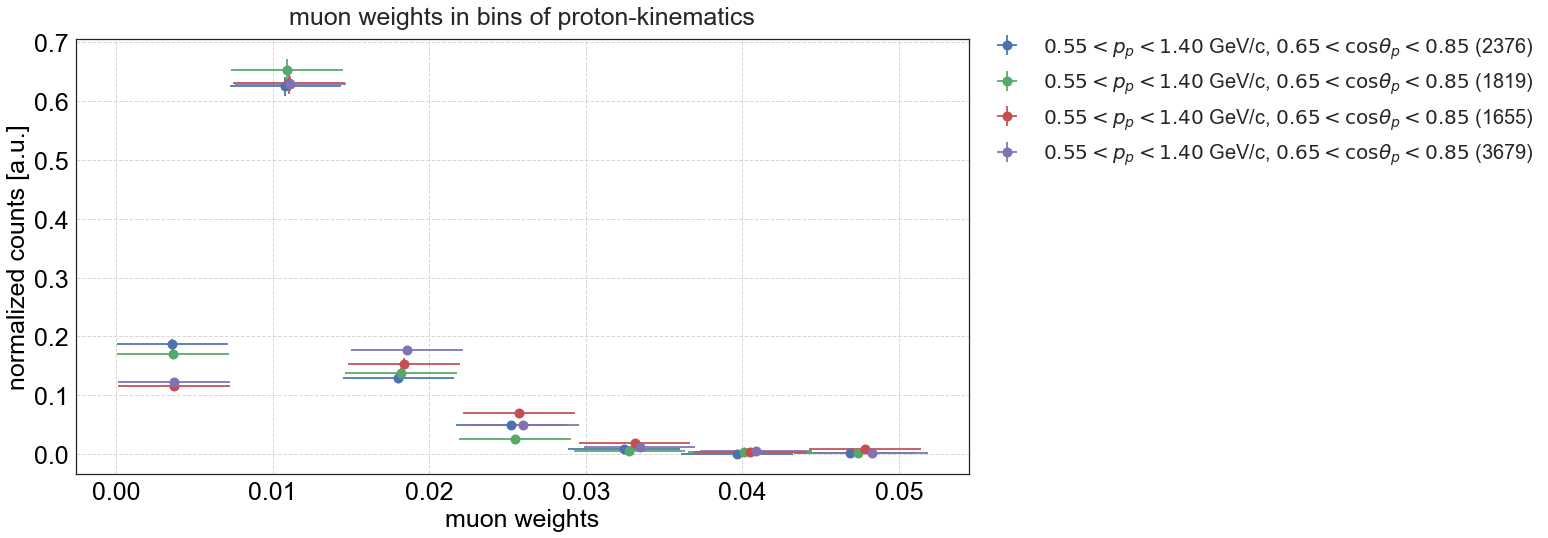

In [72]:
Pp_bins = [0.2,0.55,1.4]
ctp_bins = [0.,0.65,1]
bins=linspace(0,0.05,8)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
Pp_min_arr,Pp_max_arr  = Pp_bins[0:2], Pp_bins[1:3]
ctp_min_arr,ctp_max_arr  = ctp_bins[0:2], ctp_bins[1:3]
mid = 0.5*(bins[1:]+bins[:-1])
bin_width = bins[1]-bins[0]
for i,(Pp_min,Pp_max) in enumerate(zip(Pp_min_arr,Pp_max_arr)):
    for j,(ctp_min,ctp_max) in enumerate(zip(ctp_min_arr,ctp_max_arr)):

        sam = selected_CC1p[  (selected_CC1p['truth_Pp']>Pp_min) 
                            & (selected_CC1p['truth_Pp']<Pp_max) 
                            & (selected_CC1p['truth_Pp_cos_theta']>ctp_min) 
                            & (selected_CC1p['truth_Pp_cos_theta']<ctp_max) ]
        sam = sam[(sam["Pmu weight"]>0)&(sam["Pmu weight"]<1)]
        h,_=np.histogram(sam["Pmu weight"],bins=bins)
        herr = np.sqrt(h) / len(sam)
        h = h.astype(np.float) / len(sam)
        plt.errorbar(x=mid*(1+0.01*(2*i + j + 1)),xerr=0.5*bin_width,y=h,yerr=herr,fmt='o',markersize=10,
                     label=r'$%.2f<p_{p}<%.2f$ GeV/c, $%.2f<\cos\theta_p<%.2f$ (%d)'%(Pmu_min,Pmu_max,ctu_min,ctu_max,len(sam)))
set_axes(ax,r'muon weights',r'normalized counts [a.u.]',do_add_grid=True,do_add_legend=False,title='muon weights in bins of proton-kinematics')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=20)
plt.savefig(figures_path + 'mu_weights_in_muon_bins.pdf',bbox_inches='tight')
print 'saved',figures_path + 'mu_weights_in_proton_bins.pdf'